<img src="./logo_UTN.svg" align="right" width="250" /> 

#### Teoría de Circuitos II - R4001
# Trabajo semanal 12
#### Benjamín Ithurburu

## Introducción
En este notebook se abordarán la resolución de los ejercicios 1) y 2) de la TS12.

Se realizará la síntesis de los cuadripolos simplemente cargados, respetando las restricciones pedidas para cada punto. En el primero, se debe cumplir con la función de transferencia $\frac{V_2(s)}{V_g(s)}$ para un cuadripolo con el puerto de entrada cargado. Mientras que en el segundo punto, el cuadripolo resultante debe cumplir con la función de transferencia $\frac{V_2(s)}{I_1(s)}$, estando cargado el puerto de salida.

Ambos ejercicios fueron llevados a cabo mediante síntesis gráfica y, posteriormente, de forma analítica con la correspondiente verificación de simulaciones.


In [1]:
from IPython.display import IFrame
IFrame("./Trabajo semanal 12.pdf", width=1000, height=1000)

## Simulación Python
A continuación se procede a instanciar funciones y configurar el entorno del notebook para su posterior uso en las simulaciones.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
# módulo de análisis simbólico
from sympy import *
init_printing(use_unicode=True)
import sympy as sp
from scipy.signal import TransferFunction
# variable de Laplace
from sympy.abc import s
from IPython.display import display, Math, Markdown

from pytc2.remociones import remover_polo_jw, remover_polo_infinito, remover_polo_dc
from pytc2.dibujar import display, dibujar_elemento_derivacion, dibujar_tanque_serie, dibujar_puerto_salida, dibujar_puerto_entrada, dibujar_funcion_exc_abajo, dibujar_elemento_serie, dibujar_espacio_derivacion, Resistor, Capacitor, Inductor, dibujar_elemento_derivacion, Drawing
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from pytc2.sintesis_dipolo import foster, cauer_LC
from pytc2.sistemas_lineales import bodePlot

# Configuración de parámetros para fijar estilo de gráficos en notebook. 
# Con el objetivo de que el tamaño de salida, sea adecuado al jubyter notebook.

#%% Inicialización de librerías

# Para eliminar bugs:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 14
fig_sz_y = 8
fig_dpi = 70
fig_front_size = 15

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_front_size})

#%% Fin - Inicialización de librerías

### Ejercicio 1

#### Síntesis

<IPython.core.display.Math object>

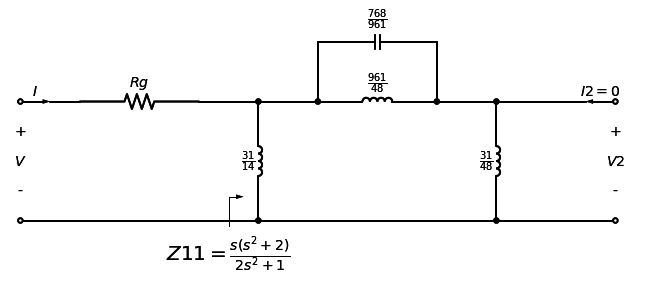

In [3]:
s = sp.symbols('s', complex=True)

ZZ = (s*(s**2 + 2))/(2*(s**2 + sp.Rational(1,2)))
display(Math('Z11(s) = ' + sp.latex(ZZ)))
################################################################################
omega_L2C2 = sp.Rational(1,4)
Y2, Yt1 = remover_polo_dc(1/ZZ, omega_zero = omega_L2C2)
# Yt1 es la admitancia removida
# extraigo L1
L1 = 1/(s*Yt1)
################################################################################
Z3, Zt2, L2, C2 = remover_polo_jw(1/Y2, isImpedance = True, omega = omega_L2C2)
################################################################################
Y4, Yt3 = remover_polo_dc(1/Z3)
# Yt3 es la impedancia removida
# extraigo L3
L3 = 1/(s*Yt3)
################################################################################

d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d = dibujar_elemento_serie(d, Resistor, "Rg")

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                 'Z11',  
                 ZZ, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_derivacion (d, Inductor, L1)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_serie(d, L2, C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Inductor, L3)

d = dibujar_espacio_derivacion(d)

d = dibujar_puerto_salida(d, voltage_lbl = ('+', '$V2$', '-'), current_lbl = '$I2 = 0$')

display(d)

#### Verificación de función transferencia con valores obtenidos en síntesis:

<IPython.core.display.Math object>

(1,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

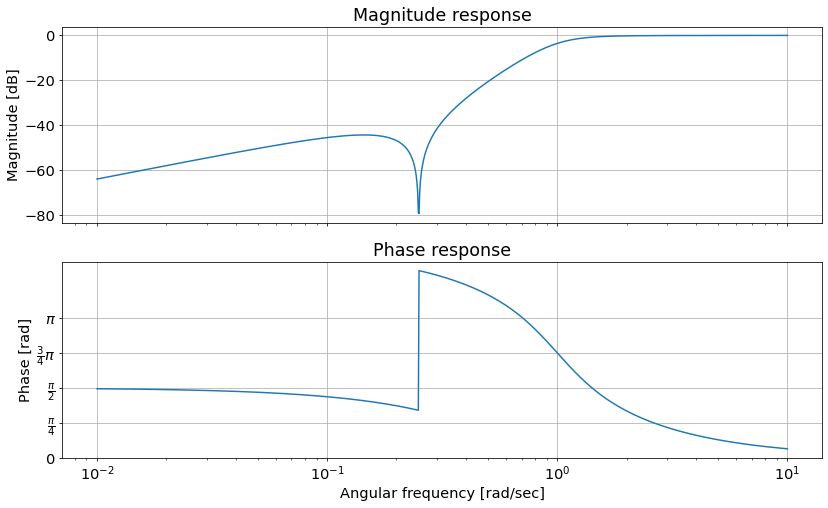

In [4]:
Rg = 1
z1 = Rg
z2 = s*L2/(1+L2*C2*s**2)
y1 = 1/(s*L1)
y2 = 1/(s*L3)


# Término A de la resultante de multiplicar dos matrices T de cuadripolos L en cascada
A = (1+z1*y1)*(1+z2*y2)+z1*y2

display(Math( r' \frac{V_o}{V_g} = ' + sp.latex(collect(sp.simplify(sp.expand(A**-1)), s))))
num, den = sp.fraction(sp.simplify(sp.expand(sp.Mul(A**-1, evaluate=False))))

num_coeffs = np.float64(sp.Poly(num,s).all_coeffs())
den_coeffs = np.float64(sp.Poly(den,s).all_coeffs())

# Obtención de función transferencia
my_tf = TransferFunction(num_coeffs,den_coeffs)

# Gráfico Bode
bodePlot(my_tf, fig_id=1)

### Ejercicio 2

#### Síntesis

<IPython.core.display.Math object>

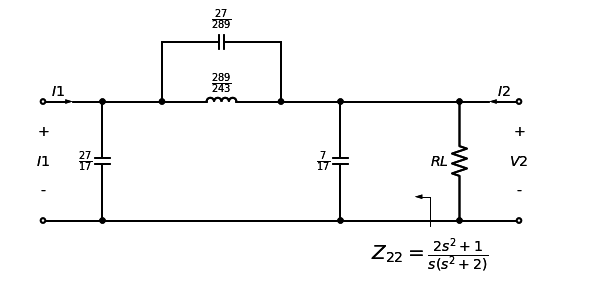

In [5]:
from pytc2.remociones import remover_valor_en_dc, remover_polo_sigma
s = sp.symbols('s', complex=True)

Z22 = 2*(s**2 + sp.Rational(1,2))/(s*(s**2 + 2))
display(Math('Z11(s) = ' + sp.latex(Z22)))
################################################################################
omega_L2C2 = 3
Y2, Yc1 = remover_polo_infinito(1/Z22, omega_zero = omega_L2C2)
# Yc1 es la admitancia removida
# extraigo C1
C1 = Yc1/s
################################################################################
Z3, Zt2, L2, C2 = remover_polo_jw(1/Y2, isImpedance = True, omega = omega_L2C2)
################################################################################
Y4, Yc3 = remover_polo_infinito(1/Z3)
# Yc3 es la impedancia removida
# extraigo C3
C3 = Yc3/s
################################################################################

d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$I1$', '-'), 
                        current_lbl = '$I1$')

d = dibujar_elemento_derivacion (d, Capacitor, C3)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_serie(d, L2, C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Capacitor, C1)

d = dibujar_espacio_derivacion(d)

d, z22_lbl = dibujar_funcion_exc_abajo(d, 
                                            'Z_{22}',  
                                            Z22, 
                                            hacia_entrada  = True, 
                                            k_gap_width = 0.5)

d = dibujar_elemento_derivacion(d, Resistor, "RL")

d = dibujar_puerto_salida(d, voltage_lbl = ('+', '$V2$', '-'), current_lbl = '$I2$')

display(d)

<IPython.core.display.Math object>

(1,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

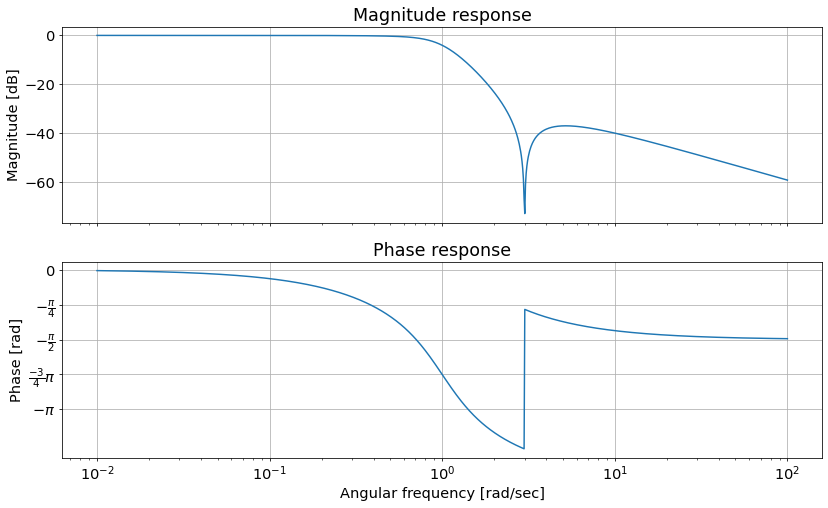

In [6]:
RL = 1
Ya = s*C3
Yb = s*C2+ 1/(s*L2)
Yc = RL + s*C1

# Término C de la matriz T para una red Pi
C = (Ya*Yb+Ya*Yc+Yc*Yb)/Yb

display(Math( r' \frac{V_2}{I_1} = ' + sp.latex(collect(sp.simplify(sp.expand(C**-1)), s))))
num, den = sp.fraction(sp.simplify(sp.expand(sp.Mul(C**-1, evaluate=False))))

num_coeffs = np.float64(sp.Poly(num,s).all_coeffs())
den_coeffs = np.float64(sp.Poly(den,s).all_coeffs())

# Obtención de función transferencia
my_tf = TransferFunction(num_coeffs,den_coeffs)

# Gráfico Bode
bodePlot(my_tf, fig_id=1)

## Simulación circuital

### Ejercicio #1

##### Ej_1: Esquemático
<center><img src="./circuito_ej1.png" width="1000"/></center>

##### Ej_1: $\frac{V2(s)}{Vg(s)}$
<center><img src="./simulacion_ej1.png" width="1000"/></center>

\begin{equation}
\omega = 2\pi \cdot f = 2\pi \cdot 39.796 \, \text{mHz} \approx \frac{1}{4}
\end{equation}


### Ejercicio #2

##### Ej_2: Esquemático
<center><img src="./circuito_ej2.png" width="1000"/></center>

##### Ej_2: $\frac{V2(s)}{I1(s)}$
<center><img src="./simulacion_ej2.png" width="1000"/></center>

\begin{equation}
\omega = 2\pi \cdot f = 2\pi \cdot 478.081 \, \text{mHz} \approx 3
\end{equation}

## Conclusión
Se verifica el cumplimiento de los ceros de transmisión a la frecuencia especificada en la función de transferencia de cada cuadripolo, lo que respalda la síntesis realizada. La simulación simbólica, que ha generado un gráfico preciso del módulo y la fase basado en la síntesis, coincide perfectamente con los resultados obtenidos en la simulación circuital en LTspice. Esta concordancia es crucial, ya que no solo valida la metodología empleada, sino que también demuestra su efectividad y aplicabilidad en el diseño de cuadripolos.